## Lab 3 Exercise   

In this exercise you will get your first accquaintance with "pandas", "numpy" and "matplotlib". 
Please try to read up a bit on them. 
1. Pandas is the basic python library for data manipulation and processing. 
2. Numpy is for numerical python. 
3. Matplotlib is used for plotting and data visualization. 

Attached is a csv file of Twitter data. The file is called "tweet_sample.csv". As you probably know, "csv" stands for comma separated values. Before processing the files open it Excel or OpenOffice. Take a look at the columns and try to get an overall sense of the data. The columns are named **'ItemID', 'Sentiment', 'SentimentText'**. 

1. Read the file into a dataframe.   
2. Split the dataframe into two dataframes of sizes 80% and 20% (of the original) respectively. The entries of the two later dataframes must be selceted randomly from the original.   
3. Swap the columns '**SentimentText**' and '**Sentiment**'
3. Save the two newly created dataframes as csv files "train.csv" and "test.csv" in the current folder (so no path) with new names for the columns "**TweetText**" and "**TweetSentiment**". This is a standard procedure in supervised learning. 
4. Create 2 lists of the tweets, "trainList" and "testList" and remove stopwords from each entry. You may use nltk stopwords.    
5. Use **TweetTokenizer** from **nltk.tokenize** to tokenize the tweets. We have to use a special tokenizer because Twitter has it's own dialect!    
6. Is it it a good idea to remove stopwards? Justify your answer in 2-3 sentences.   

In [5]:
# read the file into dataframe
import pandas as pd
import numpy as np

df = pd.read_csv('tweet_sample.csv')
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
145,146,1,&quot;The 10 Men a UK Female Internet Entrepr...
146,147,1,&quot;The truth is hiding in your eyes&quot; ...
147,148,0,&quot;Try to turn on my tv to get you out of ...
148,149,0,"&quot;well, the truth is I miss you so&quot;-..."


In [6]:
# spliting the data, the entries of the two later dataframes must be selected randomly from the original

train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)

,ItemID,Sentiment,SentimentText
1,2,0,I missed the New Moon trail...
7,8,0,Sunny Again Work Tomorrow :-| ...
14,15,0,ok thats it you win.
16,17,0,awhhe man.... I'm completely useless rt no...
23,24,0,&lt;---Sad level is 3. I was writing a mass...
26,27,0,can't be bothered. i wish i could spend the...
35,36,0,Really Dont Like Doing my Room Its So Borin...
42,43,0,*enough said*
51,52,1,bathroom is clean..... now on to more enjoya...
54,55,0,congrats to helio though


In [7]:
# Swap the columns 'SentimentText' and 'Sentiment'

columns_titles = ["SentimentText","Sentiment"]
dfx=df.reindex(columns=columns_titles)
dfx

,SentimentText,Sentiment
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,i think mi bf is cheating on me!!! ...,0
...,...,...
145,&quot;The 10 Men a UK Female Internet Entrepr...,1
146,&quot;The truth is hiding in your eyes&quot; ...,1
147,&quot;Try to turn on my tv to get you out of ...,0
148,"&quot;well, the truth is I miss you so&quot;-...",0


In [8]:
# save the new dataframes into separated csv files into tweet text and tweet sentiment

train.to_csv("TweettText.csv")
test.to_csv("TweetSentiment.csv")

In [51]:
# Create 2 lists of the tweets, "trainList" and "testList" and remove stopwords from each entry. 
# You may use nltk stopwords. 

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

trList = train.iloc[:,2].tolist()
teList = test.iloc[:,2].tolist()

train_tokenize = [word_tokenize(sent) for sent in trList]
test_tokenize = [word_tokenize(sent) for sent in teList]

trainList = [word for word in train_tokenize if not word in stopwords.words('english')]
testList = [word for word in test_tokenize if not word in stopwords.words('english')]

print(trainList)
print(testList)

[['I', "'m", 'finding', 'the', 'intercept', 'slope', '..', 'and', 'banging', 'my', 'head', 'against', 'the', 'wall', '..', 'Math', 'brain', 'heads', 'come', 'save', 'me'], ['Went', 'to', 'get', 'dog', 'from', 'vets', ',', 'theyve', 'stitched', 'her', 'ear', ',', 'charged', 'us', 'for', 'it', 'but', 'she', 'still', 'bleeds', 'like', 'a', 'waterfall', 'everytime', 'she', 'moves', '.', 'D', ':', 'WHY', '!'], ['goodbye', 'exams', ',', 'HELLO', 'ALCOHOL', 'TONIGHT'], ['...', 'Headed', 'to', 'Hospitol', ':', 'Had', 'to', 'pull', 'out', 'of', 'the', 'Golf', 'Tourny', 'in', '3rd', 'place', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', 'I', 'Think', 'I', 'Re-Ripped', 'something', '!', '!', '!', 'Yeah', 'THAT', '!', '!'], ['i', 'want', 'a', '120gb', 'harddrive', ',', 'or', 'a', '37', 'inch', 'tv', ',', 'or', 'a', 'new', 'guitar', '.', 'anyonefeeling', 'generous', '?', '=p', 'x'], ['so', 'whats', 'the', 'status', 'on', 'next', 'weekend'], ['I', 'wish', 'I', 'could', 'go', 'to', 'T4', 'On

In [53]:
# Use TweetTokenizer from nltk.tokenize to tokenize the tweets. 
# We have to use a special tokenizer because Twitter has it's own dialect! 

from nltk.tokenize import TweetTokenizer

tk = TweetTokenizer()

trtweettk = [tk.tokenize(sent) for sent in trList]
tetweettk = [tk.tokenize(sent) for sent in teList]

traintwList = [word for word in trtweettk if not word in stopwords.words('english')]
testtwList = [word for word in tetweettk if not word in stopwords.words('english')]

print(traintwList)
#print(testtwList)

[["I'm", 'finding', 'the', 'intercept', 'slope', '..', 'and', 'banging', 'my', 'head', 'against', 'the', 'wall', '..', 'Math', 'brain', 'heads', 'come', 'save', 'me'], ['Went', 'to', 'get', 'dog', 'from', 'vets', ',', 'theyve', 'stitched', 'her', 'ear', ',', 'charged', 'us', 'for', 'it', 'but', 'she', 'still', 'bleeds', 'like', 'a', 'waterfall', 'everytime', 'she', 'moves', '.', 'D:', 'WHY', '!'], ['goodbye', 'exams', ',', 'HELLO', 'ALCOHOL', 'TONIGHT'], ['...', 'Headed', 'to', 'Hospitol', ':', 'Had', 'to', 'pull', 'out', 'of', 'the', 'Golf', 'Tourny', 'in', '3rd', 'place', '!', '!', '!', 'I', 'Think', 'I', 'Re-Ripped', 'something', '!', '!', '!', 'Yeah', 'THAT', '!', '!'], ['i', 'want', 'a', '120gb', 'harddrive', ',', 'or', 'a', '37', 'inch', 'tv', ',', 'or', 'a', 'new', 'guitar', '.', 'anyonefeeling', 'generous', '?', '=p', 'x'], ['so', 'whats', 'the', 'status', 'on', 'next', 'weekend'], ['I', 'wish', 'I', 'could', 'go', 'to', 'T4', 'On', 'The', 'Beach', ":'(", 'Would', 'be', 'great'

*Is it it a good idea to remove stopwards? Justify your answer in 2-3 sentences.* 

Removing stopwords can reduce the dataset size and decrease the training time.  However, the usage of this action is depend on the tasks and problems which need to be solved. We must double check before and after removing the stopwords whether the meaning text still the same or not (specially in analyzing sentiment text).

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------

In [3]:
# 2 float arrays
X = [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
Y= [-8.08, -7.43, -4.82, -3.77, -3.07, -2.81, 0.33, -3.64, -2.25, 0.0, -0.34, 1.6, 1.55, 1.86, 
      1.54, 3.79, 3.92, 4.95, 8.43, 5.31]

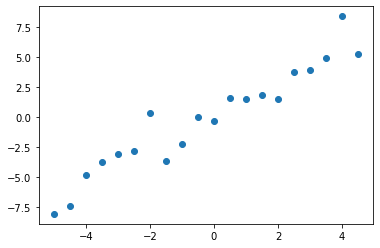

In [4]:
#We plot x vs y, a scatterplot
#scatter plots are useful for data visualization 
# These numbers were generated using sampling from a normal distribution!
import matplotlib.pyplot as plt
plt.scatter(X, Y)

We posit a simple linear (regression) model:
$$ Y = a\cdot X + b$$
So for different values of $X = x_1, x_2, \dotsc, $ the corresponding valuyes for $Y$ are $Y = y_1, y_2, \dotsc.$. The parameters $a$ and $b$ are unknown. 

We determine $a$, $b$ by *minimizing* the mean sqaure error 
$$ m = \sum_i [y_i - (ax_i +b)]^2 $$

Express the above expression as a matrix relation. 

Hint: Think in terms of scalar product and length. 

<b>Simple linear regression model in matrix (assuming there are several values of X and Y)<b>

$$\begin{bmatrix}
Y_{1}\\ Y_{2}\\ \vdots \\Y_{n} 
\end{bmatrix}
=\begin{bmatrix}
a_{1} \\ a_{2}\\ \vdots \\a_{n} 
\end{bmatrix} \begin{bmatrix}
X_1\\X_2\\ \vdots\\X_n \end{bmatrix}
+ \begin{bmatrix}
b_1\\b_2\\ \vdots\\b_n
\end{bmatrix}$$

From the matrix relation above, each observation can create an equation. In each equation, there is a, which is slope of the line, and b, which is the y-intercept. The best fit equation can be determined by Mean Square Error(MSE). MSE is the average square between actual value and predicted value of Y.